<a href="https://colab.research.google.com/github/armandoordonez/deeplearning/blob/main/LR_NN_V2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Logistic Regression with a Neural Network mindset

In this notebook You will build a logistic regression classifier to recognize  cats. This assignment will step you through how to do this with a Neural Network mindset, and so will also hone your intuitions about deep learning.

**Instructions:**
- Do not use loops (for/while) in your code, unless the instructions explicitly ask you to do so.

**You will learn to:**
- Build the general architecture of a learning algorithm, including:
    - Initializing parameters
    - Calculating the cost function and its gradient
    - Using an optimization algorithm (gradient descent)
- Gather all three functions above into a main model function, in the right order.

## 1 - Packages ##

First, let's run the cell below to import all the packages that you will need during this assignment.
- [numpy](www.numpy.org) is the fundamental package for scientific computing with Python.
- [h5py](http://www.h5py.org) is a common package to interact with a dataset that is stored on an H5 file.
- [matplotlib](http://matplotlib.org) is a famous library to plot graphs in Python.
- [PIL](http://www.pythonware.com/products/pil/) and [scipy](https://www.scipy.org/) are used here to test your model with your own picture at the end.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import h5py
import scipy
from PIL import Image
from scipy import ndimage

%matplotlib inline

In [ ]:
# Dataset:  https://drive.google.com/drive/folders/1FvFL0fpEppXAoPbaMRDPTxZOrVXHd-kv?usp=sharing

def load_dataset():
    #train_dataset = h5py.File("C:/Users/USUARIO/Documents/8voSemestre/AI2/train_catvnoncat.h5", "r")
    #train_dataset = h5py.File("C:/Users/USUARIO/Documents/8voSemestre/AI2/datasets_h5/train_carvnoncar.h5", "r")
    train_dataset = h5py.File("train_carvnoncar.h5", "r")
    #"C:\Users\USUARIO\Documents\8voSemestre\AI2\datasets_h5\test_carvnoncar.h5"
    train_set_x_orig = np.array(train_dataset["train_set_x"][:]) # your train set features
    train_set_y_orig = np.array(train_dataset["train_set_y"][:]) # your train set labels

    #test_dataset = h5py.File("C:/Users/USUARIO/Documents/8voSemestre/AI2/datasets_h5/test_carvnoncar.h5", "r")
    test_dataset = h5py.File("test_carvnoncar.h5", "r")
    test_set_x_orig = np.array(test_dataset["test_set_x"][:]) # your test set features
    test_set_y_orig = np.array(test_dataset["test_set_y"][:]) # your test set labels

    classes = np.array(test_dataset["list_classes"][:]) # the list of classes

    train_set_y_orig = train_set_y_orig.reshape((1, train_set_y_orig.shape[0]))
    test_set_y_orig = test_set_y_orig.reshape((1, test_set_y_orig.shape[0]))

    return train_set_x_orig, train_set_y_orig, test_set_x_orig, test_set_y_orig, classes

In [ ]:
def load_dataset_robust():
    """
    Versión más robusta que maneja cualquier formato de etiquetas
    """
    
    #train_dataset = h5py.File("C:/Users/USUARIO/Documents/8voSemestre/AI2/datasets_h5/train_carvnoncar.h5", "r")
    train_dataset = h5py.File("train_carvnoncar.h5", "r")
    train_set_x_orig = np.array(train_dataset["train_set_x"][:])
    train_set_y_orig = np.array(train_dataset["train_set_y"][:])
    
    #test_dataset = h5py.File("C:/Users/USUARIO/Documents/8voSemestre/AI2/datasets_h5/test_carvnoncar.h5", "r")
    test_dataset = h5py.File("test_carvnoncar.h5", "r")
    test_set_x_orig = np.array(test_dataset["test_set_x"][:])
    test_set_y_orig = np.array(test_dataset["test_set_y"][:])
    
    classes = np.array(test_dataset["list_classes"][:])
    
    # Forzar formato correcto (1, n_samples)
    train_set_y_orig = train_set_y_orig.flatten().reshape(1, -1)
    test_set_y_orig = test_set_y_orig.flatten().reshape(1, -1)
    
    print(f"📊 Dimensiones finales:")
    print(f"   X_train: {train_set_x_orig.shape}")
    print(f"   y_train: {train_set_y_orig.shape}")
    print(f"   X_test: {test_set_x_orig.shape}")
    print(f"   y_test: {test_set_y_orig.shape}")
    print(f"   classes: {classes}")
    
    return train_set_x_orig, train_set_y_orig, test_set_x_orig, test_set_y_orig, classes

In [7]:
#from google.colab import drive
#drive.mount('/content/drive')

## 2 - Overview of the Problem set ##

**Problem Statement**: You are given a dataset ("data.h5") containing:
    - a training set of m_train images labeled as cat (y=1) or non-cat (y=0)
    - a test set of m_test images labeled as cat or non-cat
    - each image is of shape (num_px, num_px, 3) where 3 is for the 3 channels (RGB). Thus, each image is square (height = num_px) and (width = num_px).

You will build a simple image-recognition algorithm that can correctly classify pictures as cat or non-cat.

Let's get more familiar with the dataset. Load the data by running the following code.

In [6]:
# Loading the data (cat/non-cat)
#train_set_x_orig, train_set_y, test_set_x_orig, test_set_y, classes = load_dataset()
train_set_x_orig, train_set_y, test_set_x_orig, test_set_y, classes = load_dataset_robust()

📊 Dimensiones finales:
   X_train: (84, 64, 64, 3)
   y_train: (1, 84)
   X_test: (21, 64, 64, 3)
   y_test: (1, 21)
   classes: [b'non-car' b'car']


We added "_orig" at the end of image datasets (train and test) because we are going to preprocess them. After preprocessing, we will end up with train_set_x and test_set_x (the labels train_set_y and test_set_y don't need any preprocessing).

Each line of your train_set_x_orig and test_set_x_orig is an array representing an image. You can visualize an example by running the following code. Feel free also to change the `index` value and re-run to see other images.

y = [0], it's a 'non-car' picture.


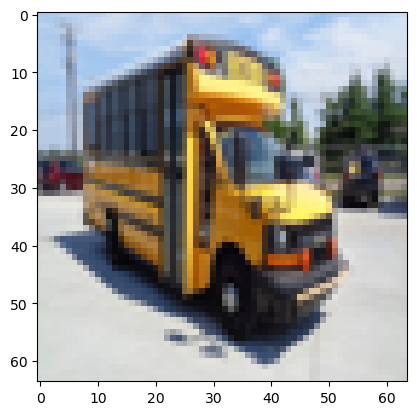

In [7]:
# Example of a picture
index = 51
plt.imshow(train_set_x_orig[index])
print ("y = " + str(train_set_y[:,index]) + ", it's a '" + classes[np.squeeze(train_set_y[:,index])].decode("utf-8") +  "' picture.")

Many software bugs in deep learning come from having matrix/vector dimensions that don't fit. If you can keep your matrix/vector dimensions straight you will go a long way toward eliminating many bugs.

**Exercise:** Find the values for:
    - m_train (number of training examples)
    - m_test (number of test examples)
    - num_px (= height = width of a training image)
Remember that `train_set_x_orig` is a numpy-array of shape (m_train, num_px, num_px, 3). For instance, you can access `m_train` by writing `train_set_x_orig.shape[0]`.

In [8]:
### START CODE HERE ### (≈ 3 lines of code)
m_train = train_set_y.shape[1]
m_test = test_set_y.shape[1]
num_px = train_set_x_orig.shape[1]
### END CODE HERE ###

print ("Number of training examples: m_train = " + str(m_train))
print ("Number of testing examples: m_test = " + str(m_test))
print ("Height/Width of each image: num_px = " + str(num_px))
print ("Each image is of size: (" + str(num_px) + ", " + str(num_px) + ", 3)")
print ("train_set_x shape: " + str(train_set_x_orig.shape))
print ("train_set_y shape: " + str(train_set_y.shape))
print ("test_set_x shape: " + str(test_set_x_orig.shape))
print ("test_set_y shape: " + str(test_set_y.shape))

Number of training examples: m_train = 84
Number of testing examples: m_test = 21
Height/Width of each image: num_px = 64
Each image is of size: (64, 64, 3)
train_set_x shape: (84, 64, 64, 3)
train_set_y shape: (1, 84)
test_set_x shape: (21, 64, 64, 3)
test_set_y shape: (1, 21)


**Expected Output for m_train, m_test and num_px**:
<table style="width:15%">
  <tr>
    <td>**m_train**</td>
    <td> 209 </td>
  </tr>
  
  <tr>
    <td>**m_test**</td>
    <td> 50 </td>
  </tr>
  
  <tr>
    <td>**num_px**</td>
    <td> 64 </td>
  </tr>
  
</table>


For convenience, you should now reshape images of shape (num_px, num_px, 3) in a numpy-array of shape (num_px $*$ num_px $*$ 3, 1). After this, our training (and test) dataset is a numpy-array where each column represents a flattened image. There should be m_train (respectively m_test) columns.

**Exercise:** Reshape the training and test data sets so that images of size (num_px, num_px, 3) are flattened into single vectors of shape (num\_px $*$ num\_px $*$ 3, 1).

A trick when you want to flatten a matrix X of shape (a,b,c,d) to a matrix X_flatten of shape (b$*$c$*$d, a) is to use:
```python
X_flatten = X.reshape(X.shape[0], -1).T      # X.T is the transpose of X
```

In [9]:
# Reshape the training and test examples

### START CODE HERE ### (≈ 2 lines of code)
train_set_x_flatten = train_set_x_orig.reshape(train_set_x_orig.shape[0], -1).T
test_set_x_flatten = test_set_x_orig.reshape(test_set_x_orig.shape[0], -1).T
### END CODE HERE ###

print ("train_set_x_flatten shape: " + str(train_set_x_flatten.shape))
print ("train_set_y shape: " + str(train_set_y.shape))
print ("test_set_x_flatten shape: " + str(test_set_x_flatten.shape))
print ("test_set_y shape: " + str(test_set_y.shape))
print ("sanity check after reshaping: " + str(train_set_x_flatten[0:5,0]))

train_set_x_flatten shape: (12288, 84)
train_set_y shape: (1, 84)
test_set_x_flatten shape: (12288, 21)
test_set_y shape: (1, 21)
sanity check after reshaping: [0.78039217 0.7607843  0.74509805 0.78431374 0.75686276]


**Expected Output**:

<table style="width:35%">
  <tr>
    <td>**train_set_x_flatten shape**</td>
    <td> (12288, 209)</td>
  </tr>
  <tr>
    <td>**train_set_y shape**</td>
    <td>(1, 209)</td>
  </tr>
  <tr>
    <td>**test_set_x_flatten shape**</td>
    <td>(12288, 50)</td>
  </tr>
  <tr>
    <td>**test_set_y shape**</td>
    <td>(1, 50)</td>
  </tr>
  <tr>
  <td>**sanity check after reshaping**</td>
  <td>[17 31 56 22 33]</td>
  </tr>
</table>

To represent color images, the red, green and blue channels (RGB) must be specified for each pixel, and so the pixel value is actually a vector of three numbers ranging from 0 to 255.

One common preprocessing step in machine learning is to center and standardize your dataset, meaning that you substract the mean of the whole numpy array from each example, and then divide each example by the standard deviation of the whole numpy array. But for picture datasets, it is simpler and more convenient and works almost as well to just divide every row of the dataset by 255 (the maximum value of a pixel channel).

<!-- During the training of your model, you're going to multiply weights and add biases to some initial inputs in order to observe neuron activations. Then you backpropogate with the gradients to train the model. But, it is extremely important for each feature to have a similar range such that our gradients don't explode. You will see that more in detail later in the lectures. !-->

Let's standardize our dataset.

In [10]:
train_set_x = train_set_x_flatten / 255.
test_set_x = test_set_x_flatten / 255.

<font color='blue'>
**What you need to remember:**

Common steps for pre-processing a new dataset are:
- Figure out the dimensions and shapes of the problem (m_train, m_test, num_px, ...)
- Reshape the datasets such that each example is now a vector of size (num_px \* num_px \* 3, 1)
- "Standardize" the data

## 3 - General Architecture of the learning algorithm ##

It's time to design a simple algorithm to distinguish cat images from non-cat images.

You will build a Logistic Regression, using a Neural Network mindset. The following Figure explains why **Logistic Regression is actually a very simple Neural Network!**



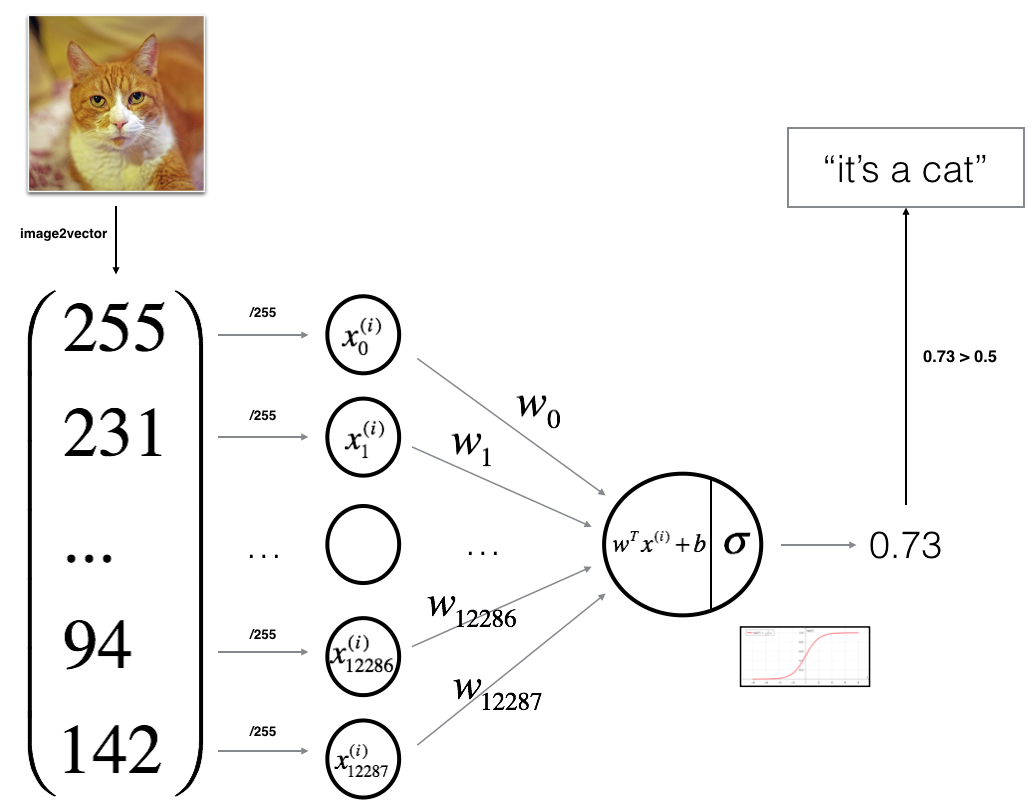
**Mathematical expression of the algorithm**:

For one example $x^{(i)}$:
$$z^{(i)} = w^T x^{(i)} + b \tag{1}$$
$$\hat{y}^{(i)} = a^{(i)} = sigmoid(z^{(i)})\tag{2}$$
$$ \mathcal{L}(a^{(i)}, y^{(i)}) =  - y^{(i)}  \log(a^{(i)}) - (1-y^{(i)} )  \log(1-a^{(i)})\tag{3}$$

The cost is then computed by summing over all training examples:
$$ J = \frac{1}{m} \sum_{i=1}^m \mathcal{L}(a^{(i)}, y^{(i)})\tag{6}$$

**Key steps**:
In this exercise, you will carry out the following steps:
    - Initialize the parameters of the model
    - Learn the parameters for the model by minimizing the cost  
    - Use the learned parameters to make predictions (on the test set)
    - Analyse the results and conclude

## 4 - Building the parts of our algorithm ##

The main steps for building a Neural Network are:
1. Define the model structure (such as number of input features)
2. Initialize the model's parameters
3. Loop:
    - Calculate current loss (forward propagation)
    - Calculate current gradient (backward propagation)
    - Update parameters (gradient descent)

You often build 1-3 separately and integrate them into one function we call `model()`.

### 4.1 - Helper functions

**Exercise**: Using your code from "Python Basics", implement `sigmoid()`. As you've seen in the figure above, you need to compute $sigmoid( w^T x + b)$ to make predictions.

In [11]:
# GRADED FUNCTION: sigmoid

def sigmoid(z):
    """
    Compute the sigmoid of z

    Arguments:
    x -- A scalar or numpy array of any size.

    Return:
    s -- sigmoid(z)
    """

    ### START CODE HERE ### (≈ 1 line of code)
    s = 1 / (1 + np.exp(-z))
    ### END CODE HERE ###

    return s

In [12]:
print ("sigmoid(0) = " + str(sigmoid(0)))
print ("sigmoid(9.2) = " + str(sigmoid(9.2)))

sigmoid(0) = 0.5
sigmoid(9.2) = 0.9998989708060922


**Expected Output**:

<table style="width:20%">
  <tr>
    <td>**sigmoid(0)**</td>
    <td> 0.5</td>
  </tr>
  
  <tr>
    <td>**sigmoid(9.2)**</td>
    <td> 0.999898970806 </td>
  </tr>
</table>

### 4.2 - Initializing parameters

**Exercise:** Implement parameter initialization in the cell below. You have to initialize w as a vector of zeros. If you don't know what numpy function to use, look up np.zeros() in the Numpy library's documentation.

In [13]:
# GRADED FUNCTION: initialize_with_zeros

def initialize_with_zeros(dim):
    """
    This function creates a vector of zeros of shape (dim, 1) for w and initializes b to 0.

    Argument:
    dim -- size of the w vector we want (or number of parameters in this case)

    Returns:
    w -- initialized vector of shape (dim, 1)
    b -- initialized scalar (corresponds to the bias)
    """

    ### START CODE HERE ### (≈ 1 line of code)
    w = np.zeros(shape=(dim, 1))
    b = 0
    ### END CODE HERE ###

    assert(w.shape == (dim, 1))
    assert(isinstance(b, float) or isinstance(b, int))

    return w, b

In [14]:
dim = 2
w, b = initialize_with_zeros(dim)
print ("w = " + str(w))
print ("b = " + str(b))

w = [[0.]
 [0.]]
b = 0


**Expected Output**:


<table style="width:15%">
    <tr>
        <td>  ** w **  </td>
        <td> [[ 0.]
 [ 0.]] </td>
    </tr>
    <tr>
        <td>  ** b **  </td>
        <td> 0 </td>
    </tr>
</table>

For image inputs, w will be of shape (num_px $\times$ num_px $\times$ 3, 1).

### 4.3 - Forward and Backward propagation

Now that your parameters are initialized, you can do the "forward" and "backward" propagation steps for learning the parameters.

**Exercise:** Implement a function `propagate()` that computes the cost function and its gradient.

**Hints**:

Forward Propagation:
- You get X
- You compute $A = \sigma(w^T X + b) = (a^{(0)}, a^{(1)}, ..., a^{(m-1)}, a^{(m)})$
- You calculate the cost function: $J = -\frac{1}{m}\sum_{i=1}^{m}y^{(i)}\log(a^{(i)})+(1-y^{(i)})\log(1-a^{(i)})$

Here are the two formulas you will be using:

$$ \frac{\partial J}{\partial w} = \frac{1}{m}X(A-Y)^T\tag{7}$$
$$ \frac{\partial J}{\partial b} = \frac{1}{m} \sum_{i=1}^m (a^{(i)}-y^{(i)})\tag{8}$$

In [15]:
# GRADED FUNCTION: propagate

def propagate(w, b, X, Y):
    """
    Implement the cost function and its gradient for the propagation explained above

    Arguments:
    w -- weights, a numpy array of size (num_px * num_px * 3, 1)
    b -- bias, a scalar
    X -- data of size (num_px * num_px * 3, number of examples)
    Y -- true "label" vector (containing 0 if non-cat, 1 if cat) of size (1, number of examples)

    Return:
    cost -- negative log-likelihood cost for logistic regression
    dw -- gradient of the loss with respect to w, thus same shape as w
    db -- gradient of the loss with respect to b, thus same shape as b

    Tips:
    - Write your code step by step for the propagation
    """

    m = X.shape[1]

    # FORWARD PROPAGATION (FROM X TO COST)
    ### START CODE HERE ### (≈ 2 lines of code)
    A = sigmoid(np.dot(w.T, X) + b)  # compute activation
    cost = (- 1 / m) * np.sum(Y * np.log(A) + (1 - Y) * (np.log(1 - A)))  # compute cost
    ### END CODE HERE ###

    # BACKWARD PROPAGATION (TO FIND GRAD)
    ### START CODE HERE ### (≈ 2 lines of code)
    dw = (1 / m) * np.dot(X, (A - Y).T)
    db = (1 / m) * np.sum(A - Y)
    ### END CODE HERE ###

    assert(dw.shape == w.shape)
    assert(db.dtype == float)
    cost = np.squeeze(cost)
    assert(cost.shape == ())

    grads = {"dw": dw,
             "db": db}

    return grads, cost

In [16]:
w, b, X, Y = np.array([[1], [2]]), 2, np.array([[1,2], [3,4]]), np.array([[1, 0]])
grads, cost = propagate(w, b, X, Y)
print ("dw = " + str(grads["dw"]))
print ("db = " + str(grads["db"]))
print ("cost = " + str(cost))

dw = [[0.99993216]
 [1.99980262]]
db = 0.49993523062470574
cost = 6.000064773192205


**Expected Output**:

<table style="width:50%">
    <tr>
        <td>  ** dw **  </td>
        <td> [[ 0.99993216]
 [ 1.99980262]]</td>
    </tr>
    <tr>
        <td>  ** db **  </td>
        <td> 0.499935230625 </td>
    </tr>
    <tr>
        <td>  ** cost **  </td>
        <td> 6.000064773192205</td>
    </tr>

</table>

### d) Optimization
- You have initialized your parameters.
- You are also able to compute a cost function and its gradient.
- Now, you want to update the parameters using gradient descent.

**Exercise:** Write down the optimization function. The goal is to learn $w$ and $b$ by minimizing the cost function $J$. For a parameter $\theta$, the update rule is $ \theta = \theta - \alpha \text{ } d\theta$, where $\alpha$ is the learning rate.

In [17]:
# GRADED FUNCTION: optimize

def optimize(w, b, X, Y, num_iterations, learning_rate, print_cost = False):
    """
    This function optimizes w and b by running a gradient descent algorithm

    Arguments:
    w -- weights, a numpy array of size (num_px * num_px * 3, 1)
    b -- bias, a scalar
    X -- data of shape (num_px * num_px * 3, number of examples)
    Y -- true "label" vector (containing 0 if non-cat, 1 if cat), of shape (1, number of examples)
    num_iterations -- number of iterations of the optimization loop
    learning_rate -- learning rate of the gradient descent update rule
    print_cost -- True to print the loss every 100 steps

    Returns:
    params -- dictionary containing the weights w and bias b
    grads -- dictionary containing the gradients of the weights and bias with respect to the cost function
    costs -- list of all the costs computed during the optimization, this will be used to plot the learning curve.

    Tips:
    You basically need to write down two steps and iterate through them:
        1) Calculate the cost and the gradient for the current parameters. Use propagate().
        2) Update the parameters using gradient descent rule for w and b.
    """

    costs = []

    for i in range(num_iterations):


        # Cost and gradient calculation (≈ 1-4 lines of code)
        ### START CODE HERE ###
        grads, cost = propagate(w, b, X, Y)
        ### END CODE HERE ###

        # Retrieve derivatives from grads
        dw = grads["dw"]
        db = grads["db"]

        # update rule (≈ 2 lines of code)
        ### START CODE HERE ###
        w = w - learning_rate * dw  # need to broadcast
        b = b - learning_rate * db
        ### END CODE HERE ###

        # Record the costs
        if i % 100 == 0:
            costs.append(cost)

        # Print the cost every 100 training examples
        if print_cost and i % 100 == 0:
            print ("Cost after iteration %i: %f" % (i, cost))

    params = {"w": w,
              "b": b}

    grads = {"dw": dw,
             "db": db}

    return params, grads, costs

In [18]:
params, grads, costs = optimize(w, b, X, Y, num_iterations= 100, learning_rate = 0.009, print_cost = False)

print ("w = " + str(params["w"]))
print ("b = " + str(params["b"]))
print ("dw = " + str(grads["dw"]))
print ("db = " + str(grads["db"]))

w = [[0.1124579 ]
 [0.23106775]]
b = 1.5593049248448891
dw = [[0.90158428]
 [1.76250842]]
db = 0.4304620716786828


**Expected Output**:

 **w** = [[ 0.1124579 ]
 [ 0.23106775]]
  **b** =  1.55930492484
  **dw** = [[ 0.90158428] [ 1.76250842]]
  **db** =  0.430462071679

**Exercise:** The previous function will output the learned w and b. We are able to use w and b to predict the labels for a dataset X. Implement the `predict()` function. There is two steps to computing predictions:

1. Calculate $\hat{Y} = A = \sigma(w^T X + b)$

2. Convert the entries of a into 0 (if activation <= 0.5) or 1 (if activation > 0.5), stores the predictions in a vector `Y_prediction`. If you wish, you can use an `if`/`else` statement in a `for` loop (though there is also a way to vectorize this).

In [19]:
# GRADED FUNCTION: predict

def predict(w, b, X):
    '''
    Predict whether the label is 0 or 1 using learned logistic regression parameters (w, b)

    Arguments:
    w -- weights, a numpy array of size (num_px * num_px * 3, 1)
    b -- bias, a scalar
    X -- data of size (num_px * num_px * 3, number of examples)

    Returns:
    Y_prediction -- a numpy array (vector) containing all predictions (0/1) for the examples in X
    '''

    m = X.shape[1]
    Y_prediction = np.zeros((1, m))
    w = w.reshape(X.shape[0], 1)

    # Compute vector "A" predicting the probabilities of a cat being present in the picture
    ### START CODE HERE ### (≈ 1 line of code)
    A = sigmoid(np.dot(w.T, X) + b)
    ### END CODE HERE ###

    for i in range(A.shape[1]):
        # Convert probabilities a[0,i] to actual predictions p[0,i]
        ### START CODE HERE ### (≈ 4 lines of code)
        Y_prediction[0, i] = 1 if A[0, i] > 0.5 else 0
        ### END CODE HERE ###

    assert(Y_prediction.shape == (1, m))

    return Y_prediction

In [17]:
print("predictions = " + str(predict(w, b, X)))

predictions = [[1. 1.]]


**Expected Output**:

<table style="width:30%">
    <tr>
         <td>
             **predictions**
         </td>
          <td>
            [[ 1.  1.]]
         </td>  
   </tr>

</table>


<font color='blue'>
**What to remember:**
You've implemented several functions that:
- Initialize (w,b)
- Optimize the loss iteratively to learn parameters (w,b):
    - computing the cost and its gradient
    - updating the parameters using gradient descent
- Use the learned (w,b) to predict the labels for a given set of examples

## 5 - Merge all functions into a model ##

You will now see how the overall model is structured by putting together all the building blocks (functions implemented in the previous parts) together, in the right order.

**Exercise:** Implement the model function. Use the following notation:
    - Y_prediction for your predictions on the test set
    - Y_prediction_train for your predictions on the train set
    - w, costs, grads for the outputs of optimize()

In [25]:
# GRADED FUNCTION: model

def model(X_train, Y_train, X_test, Y_test, num_iterations=2000, learning_rate=0.5, print_cost=False):
    """
    Builds the logistic regression model by calling the function you've implemented previously

    Arguments:
    X_train -- training set represented by a numpy array of shape (num_px * num_px * 3, m_train)
    Y_train -- training labels represented by a numpy array (vector) of shape (1, m_train)
    X_test -- test set represented by a numpy array of shape (num_px * num_px * 3, m_test)
    Y_test -- test labels represented by a numpy array (vector) of shape (1, m_test)
    num_iterations -- hyperparameter representing the number of iterations to optimize the parameters
    learning_rate -- hyperparameter representing the learning rate used in the update rule of optimize()
    print_cost -- Set to true to print the cost every 100 iterations

    Returns:
    d -- dictionary containing information about the model.
    """

    ### START CODE HERE ###
    # initialize parameters with zeros (≈ 1 line of code)
    w, b = initialize_with_zeros(X_train.shape[0])

    # Gradient descent (≈ 1 line of code)
    parameters, grads, costs = optimize(w, b, X_train, Y_train, num_iterations, learning_rate, print_cost)

    # Retrieve parameters w and b from dictionary "parameters"
    w = parameters["w"]
    b = parameters["b"]

    # Predict test/train set examples (≈ 2 lines of code)
    Y_prediction_test = predict(w, b, X_test)
    Y_prediction_train = predict(w, b, X_train)

    ### END CODE HERE ###

    # Print train/test Errors
    print("train accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_train - Y_train)) * 100))
    print("test accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_test - Y_test)) * 100))


    d = {"costs": costs,
         "Y_prediction_test": Y_prediction_test,
         "Y_prediction_train" : Y_prediction_train,
         "w" : w,
         "b" : b,
         "learning_rate" : learning_rate,
         "num_iterations": num_iterations}

    return d

Run the following cell to train your model.

In [26]:
d = model(train_set_x, train_set_y, test_set_x, test_set_y, num_iterations = 2000, learning_rate = 0.005, print_cost = True)

Cost after iteration 0: 0.693147
Cost after iteration 100: 0.679833
Cost after iteration 200: 0.669539
Cost after iteration 300: 0.661566
Cost after iteration 400: 0.655374
Cost after iteration 500: 0.650552
Cost after iteration 600: 0.646784
Cost after iteration 700: 0.643827
Cost after iteration 800: 0.641498
Cost after iteration 900: 0.639654
Cost after iteration 1000: 0.638186
Cost after iteration 1100: 0.637011
Cost after iteration 1200: 0.636064
Cost after iteration 1300: 0.635294
Cost after iteration 1400: 0.634664
Cost after iteration 1500: 0.634142
Cost after iteration 1600: 0.633706
Cost after iteration 1700: 0.633336
Cost after iteration 1800: 0.633019
Cost after iteration 1900: 0.632744
train accuracy: 66.66666666666667 %
test accuracy: 66.66666666666667 %


**Expected Output**:

<table style="width:40%">
    
    <tr>
        <td> **Train Accuracy**  </td>
        <td> 99.04306220095694 % </td>
    </tr>

    <tr>
        <td>**Test Accuracy** </td>
        <td> 70.0 % </td>
    </tr>
</table>




**Comment**: Training accuracy is close to 100%. This is a good sanity check: your model is working and has high enough capacity to fit the training data. Test error is 68%. It is actually not bad for this simple model, given the small dataset we used and that logistic regression is a linear classifier. But no worries, you'll build an even better classifier next week!

Also, you see that the model is clearly overfitting the training data. Later in this specialization you will learn how to reduce overfitting, for example by using regularization. Using the code below (and changing the `index` variable) you can look at predictions on pictures of the test set.

Original size : 12288
Real y = 0
predicted = 0.0


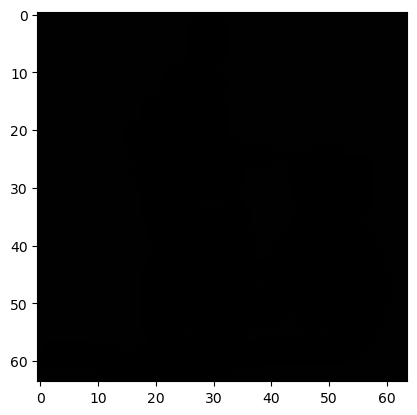

In [22]:
# Example of a picture that was wrongly classified.
index = 5
plt.imshow(test_set_x[:,index].reshape((num_px, num_px, 3)))


print(f"Original size : {test_set_x[:,index].size}") # 5464x3640

print ("Real y = " + str(test_set_y[0, index]))

print ("predicted = " + str(d['Y_prediction_test'][0, index]))

Let's also plot the cost function and the gradients.

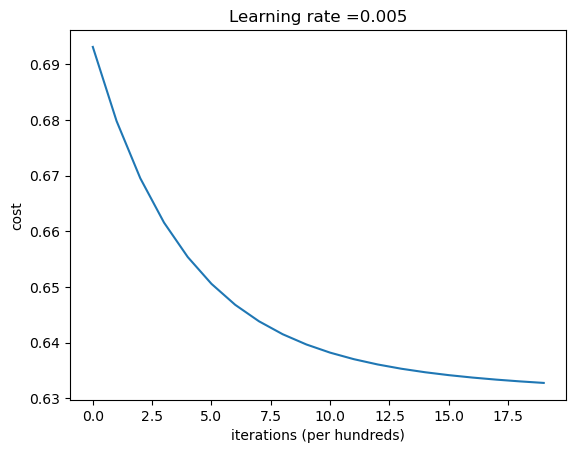

In [23]:
# Plot learning curve (with costs)
costs = np.squeeze(d['costs'])
plt.plot(costs)
plt.ylabel('cost')
plt.xlabel('iterations (per hundreds)')
plt.title("Learning rate =" + str(d["learning_rate"]))
plt.show()

**Interpretation**:
You can see the cost decreasing. It shows that the parameters are being learned. However, you see that you could train the model even more on the training set. Try to increase the number of iterations in the cell above and rerun the cells. You might see that the training set accuracy goes up, but the test set accuracy goes down. This is called overfitting.

## 6 - Further analysis (optional/ungraded exercise) ##

Congratulations on building your first image classification model. Let's analyze it further, and examine possible choices for the learning rate $\alpha$.

#### Choice of learning rate ####

**Reminder**:
In order for Gradient Descent to work you must choose the learning rate wisely. The learning rate $\alpha$  determines how rapidly we update the parameters. If the learning rate is too large we may "overshoot" the optimal value. Similarly, if it is too small we will need too many iterations to converge to the best values. That's why it is crucial to use a well-tuned learning rate.

Let's compare the learning curve of our model with several choices of learning rates. Run the cell below. This should take about 1 minute. Feel free also to try different values than the three we have initialized the `learning_rates` variable to contain, and see what happens.

learning rate is: 0.01
train accuracy: 66.66666666666667 %
test accuracy: 66.66666666666667 %

-------------------------------------------------------

learning rate is: 0.001
train accuracy: 66.66666666666667 %
test accuracy: 66.66666666666667 %

-------------------------------------------------------

learning rate is: 0.0001
train accuracy: 66.66666666666667 %
test accuracy: 66.66666666666667 %

-------------------------------------------------------



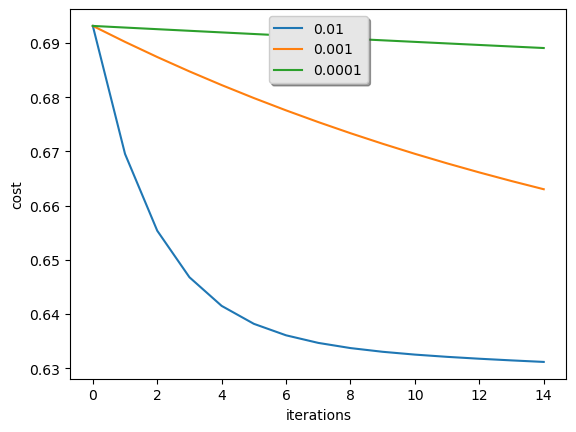

In [24]:
learning_rates = [0.01, 0.001, 0.0001]
models = {}
for i in learning_rates:
    print ("learning rate is: " + str(i))
    models[str(i)] = model(train_set_x, train_set_y, test_set_x, test_set_y, num_iterations = 1500, learning_rate = i, print_cost = False)
    print ('\n' + "-------------------------------------------------------" + '\n')

for i in learning_rates:
    plt.plot(np.squeeze(models[str(i)]["costs"]), label= str(models[str(i)]["learning_rate"]))

plt.ylabel('cost')
plt.xlabel('iterations')

legend = plt.legend(loc='upper center', shadow=True)
frame = legend.get_frame()
frame.set_facecolor('0.90')
plt.show()

**Interpretation**:
- Different learning rates give different costs and thus different predictions results.
- If the learning rate is too large (0.01), the cost may oscillate up and down. It may even diverge (though in this example, using 0.01 still eventually ends up at a good value for the cost).
- A lower cost doesn't mean a better model. You have to check if there is possibly overfitting. It happens when the training accuracy is a lot higher than the test accuracy.
- In deep learning, we usually recommend that you:
    - Choose the learning rate that better minimizes the cost function.
    - If your model overfits, use other techniques to reduce overfitting. (We'll talk about this in later videos.)


## 7 - Test with your own image (optional/ungraded exercise) ##

Congratulations on finishing this assignment. You can use your own image and see the output of your model. To do that:
    1. Click on "File" in the upper bar of this notebook, then click "Open" to go on your Coursera Hub.
    2. Add your image to this Jupyter Notebook's directory, in the "images" folder
    3. Change your image's name in the following code
    4. Run the code and check if the algorithm is right (1 = cat, 0 = non-cat)!

Image Height       :  600
Image Width        :  800
Number of Channels :  3
New dimensions 64 64 3


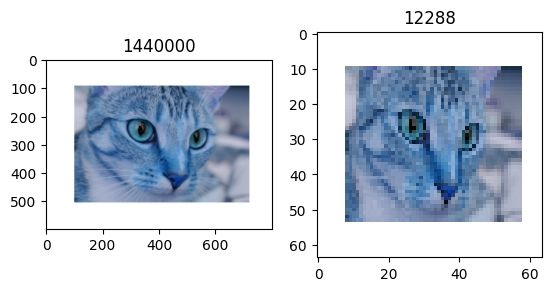

In [ ]:
import cv2

# read image
img = cv2.imread('drive/MyDrive/datasets/gato.jpg', cv2.IMREAD_UNCHANGED)

# get dimensions of image
dimensions = img

# height, width, number of channels in image
height = img.shape[0]
width = img.shape[1]
channels = img.shape[2]

#print('Image Dimension    : ',dimensions)
print('Image Height       : ',height)
print('Image Width        : ',width)
print('Number of Channels : ',channels)

h, w, c = img.shape

# new resized image
resizedImage = cv2.resize(img, (64, 64))

h, w, c = resizedImage.shape

print ("New dimensions", h, w, c)

def plot_image(img1, img2):
    plt.subplot(1, 2, 1)

    plt.imshow(img1)
    plt.title(img1.size)

    plt.subplot(1, 2, 2)
    plt.imshow(img2)
    plt.title(img2.size)

    plt.show()

plot_image(img, resizedImage)

In [ ]:
my_image = resizedImage.reshape((1, num_px * num_px * 3)).T
my_predicted_image = predict(d["w"], d["b"], my_image)
print(my_predicted_image)


print("y = " + str(np.squeeze(my_predicted_image)) + ", your algorithm predicts a \"" + classes[int(np.squeeze(my_predicted_image)),].decode("utf-8") +  "\" picture.")

[[1.]]
y = 1.0, your algorithm predicts a "cat" picture.


<font color='blue'>
**What to remember from this assignment:**
1. Preprocessing the dataset is important.
2. You implemented each function separately: initialize(), propagate(), optimize(). Then you built a model().
3. Tuning the learning rate (which is an example of a "hyperparameter") can make a big difference to the algorithm. You will see more examples of this later in this course!

Finally, if you'd like, we invite you to try different things on this Notebook. Make sure you submit before trying anything. Once you submit, things you can play with include:
    - Play with the learning rate and the number of iterations
    - Try different initialization methods and compare the results
    - Test other preprocessings (center the data, or divide each row by its standard deviation)

Bibliography:
- http://www.wildml.com/2015/09/implementing-a-neural-network-from-scratch/
- https://stats.stackexchange.com/questions/211436/why-do-we-normalize-images-by-subtracting-the-datasets-image-mean-and-not-the-c

📝 Ejemplo de uso del creador de datasets H5

🚀 Iniciando creación completa del dataset H5...

🔄 Cargando datos desde CSV...
✓ CSV cargado: 105 registros
🔄 Procesando imágenes...


c:\Users\USUARIO\anaconda3\Lib\site-packages\PIL\Image.py:1000: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


  Procesadas: 100/105

📊 Resumen de procesamiento:
✓ Imágenes procesadas exitosamente: 105
❌ Imágenes fallidas: 0

📐 Dimensiones finales:
  Imágenes (X): (105, 64, 64, 3)
  Etiquetas (y): (105,)

🔀 Dividiendo datos (test_size=0.2)...
📊 División completada:
  Entrenamiento: 84 imágenes
  Prueba: 21 imágenes

📈 Distribución de clases:
  Entrenamiento - Carros: 28, No-carros: 56
  Prueba - Carros: 7, No-carros: 14

💾 Guardando archivos H5...
✅ Archivos H5 guardados:
  📁 Entrenamiento: datasets_h5\train_carvnoncar.h5
  📁 Prueba: datasets_h5\test_carvnoncar.h5

🔍 Verificando archivos H5...

📋 Entrenamiento (train_carvnoncar.h5):
  - list_classes: (2,) (|S7)
  - train_set_x: (84, 64, 64, 3) (float32)
  - train_set_y: (1, 84) (int32)
  Metadatos:
    - description: Car vs Non-car training dataset
    - image_shape: [64 64  3]
    - num_examples: 84

📋 Prueba (test_carvnoncar.h5):
  - list_classes: (2,) (|S7)
  - test_set_x: (21, 64, 64, 3) (float32)
  - test_set_y: (1, 21) (int32)
  Metadatos

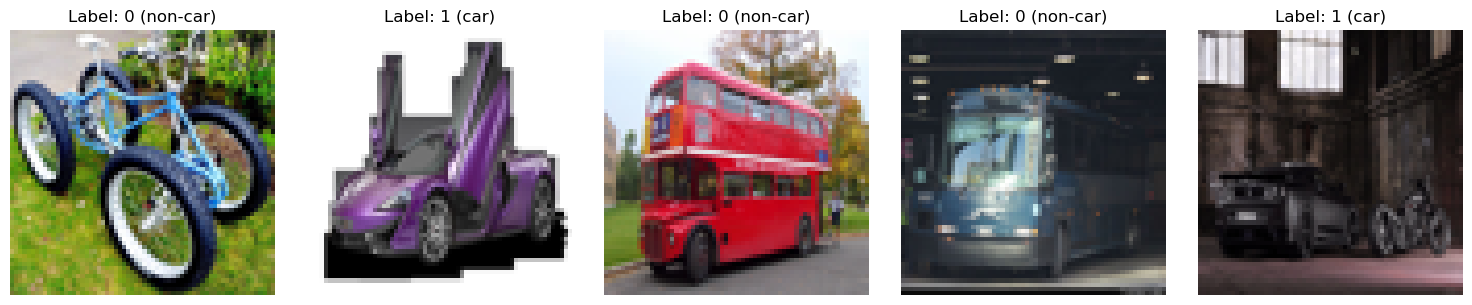

In [57]:
import h5py
import numpy as np
from PIL import Image
import pandas as pd
import os
from pathlib import Path
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

class H5DatasetCreator:
    def __init__(self, images_folder, csv_labels, output_folder='datasets'):
        """
        Creador de datasets en formato H5
        
        Args:
            images_folder: Carpeta con las imágenes
            csv_labels: Archivo CSV con las etiquetas
            output_folder: Carpeta donde guardar los archivos H5
        """
        self.images_folder = Path(images_folder)
        self.csv_labels = csv_labels
        self.output_folder = Path(output_folder)
        
        # Crear carpeta de salida si no existe
        self.output_folder.mkdir(exist_ok=True)
    
    def load_and_process_data(self, img_size=(64, 64), normalize=True):
        """
        Carga y procesa todas las imágenes y etiquetas
        
        Args:
            img_size: Tamaño objetivo para redimensionar imágenes (ancho, alto)
            normalize: Si normalizar valores de píxeles a [0,1]
        
        Returns:
            X: Array de imágenes
            y: Array de etiquetas
            filenames: Lista de nombres de archivos
        """
        print("🔄 Cargando datos desde CSV...")
        
        # Cargar etiquetas
        if not os.path.exists(self.csv_labels):
            raise FileNotFoundError(f"No se encuentra el archivo: {self.csv_labels}")
        
        df = pd.read_csv(self.csv_labels)
        print(f"✓ CSV cargado: {len(df)} registros")
        
        # Verificar columnas requeridas
        required_cols = ['filename', 'label']
        if not all(col in df.columns for col in required_cols):
            raise ValueError(f"El CSV debe tener columnas: {required_cols}")
        
        images = []
        labels = []
        valid_filenames = []
        failed_files = []
        
        print("🔄 Procesando imágenes...")
        
        for idx, row in df.iterrows():
            filename = row['filename']
            label = row['label']
            
            # Construir ruta completa - buscar con diferentes extensiones si es necesario
            img_path = self.images_folder / filename
            
            # Si el archivo no existe, intentar con extensiones comunes
            if not img_path.exists():
                extensions = ['.jpg', '.jpeg', '.png', '.bmp', '.tiff', '.gif']
                found = False
                
                for ext in extensions:
                    img_path_with_ext = self.images_folder / (filename + ext)
                    if img_path_with_ext.exists():
                        img_path = img_path_with_ext
                        found = True
                        break
                
                if not found:
                    failed_files.append(f"{filename} - No existe (probado: {filename}, {filename}.jpg, {filename}.png, etc.)")
                    continue
            
            try:
                
                # Abrir y procesar imagen
                with Image.open(img_path) as img:
                    # Convertir a RGB si es necesario
                    if img.mode != 'RGB':
                        img = img.convert('RGB')
                    
                    # Redimensionar
                    img_resized = img.resize(img_size)
                    
                    # Convertir a array numpy
                    img_array = np.array(img_resized)
                    
                    # Normalizar si se solicita
                    if normalize:
                        img_array = img_array.astype(np.float32) / 255.0
                    
                    images.append(img_array)
                    labels.append(label)
                    valid_filenames.append(filename)
            
            except Exception as e:
                failed_files.append(f"{filename} - Error: {str(e)}")
                continue
            
            # Mostrar progreso
            if (idx + 1) % 100 == 0:
                print(f"  Procesadas: {idx + 1}/{len(df)}")
        
        # Mostrar resumen
        print(f"\n📊 Resumen de procesamiento:")
        print(f"✓ Imágenes procesadas exitosamente: {len(images)}")
        print(f"❌ Imágenes fallidas: {len(failed_files)}")
        
        if failed_files:
            print(f"\n⚠️  Archivos con problemas:")
            for fail in failed_files[:10]:  # Mostrar solo los primeros 10
                print(f"  - {fail}")
            if len(failed_files) > 10:
                print(f"  ... y {len(failed_files) - 10} más")
        
        # Convertir a arrays numpy
        X = np.array(images)
        y = np.array(labels)
        
        print(f"\n📐 Dimensiones finales:")
        print(f"  Imágenes (X): {X.shape}")
        print(f"  Etiquetas (y): {y.shape}")
        
        return X, y, valid_filenames
    
    def create_train_test_split(self, X, y, filenames, test_size=0.2, random_state=42):
        """
        Divide los datos en conjuntos de entrenamiento y prueba
        """
        print(f"\n🔀 Dividiendo datos (test_size={test_size})...")
        
        X_train, X_test, y_train, y_test, files_train, files_test = train_test_split(
            X, y, filenames, test_size=test_size, random_state=random_state, 
            stratify=y  # Mantener proporción de clases
        )
        
        print(f"📊 División completada:")
        print(f"  Entrenamiento: {len(X_train)} imágenes")
        print(f"  Prueba: {len(X_test)} imágenes")
        
        # Mostrar distribución de clases
        unique_train, counts_train = np.unique(y_train, return_counts=True)
        unique_test, counts_test = np.unique(y_test, return_counts=True)
        
        print(f"\n📈 Distribución de clases:")
        print(f"  Entrenamiento - Carros: {counts_train[1] if len(counts_train) > 1 else 0}, No-carros: {counts_train[0]}")
        print(f"  Prueba - Carros: {counts_test[1] if len(counts_test) > 1 else 0}, No-carros: {counts_test[0]}")
        
        return X_train, X_test, y_train, y_test, files_train, files_test
    
    def save_to_h5(self, X_train, X_test, y_train, y_test, files_train, files_test):
        """
        Guarda los datos en archivos H5
        """
        print("\n💾 Guardando archivos H5...")
        
        # Reshape etiquetas para formato esperado: (1, num_examples)
        y_train_reshaped = y_train.reshape(1, -1)
        y_test_reshaped = y_test.reshape(1, -1)
        
        # Nombres de clases
        classes = np.array([b'non-car', b'car'])  # Bytes para compatibilidad
        
        # Guardar conjunto de entrenamiento
        train_file = self.output_folder / 'train_carvnoncar.h5'
        with h5py.File(train_file, 'w') as f:
            f.create_dataset('train_set_x', data=X_train)
            f.create_dataset('train_set_y', data=y_train_reshaped)
            f.create_dataset('list_classes', data=classes)
            
            # Metadatos opcionales
            f.attrs['description'] = 'Car vs Non-car training dataset'
            f.attrs['num_examples'] = len(X_train)
            f.attrs['image_shape'] = X_train.shape[1:]
        
        # Guardar conjunto de prueba
        test_file = self.output_folder / 'test_carvnoncar.h5'
        with h5py.File(test_file, 'w') as f:
            f.create_dataset('test_set_x', data=X_test)
            f.create_dataset('test_set_y', data=y_test_reshaped)
            f.create_dataset('list_classes', data=classes)
            
            # Metadatos opcionales
            f.attrs['description'] = 'Car vs Non-car test dataset'
            f.attrs['num_examples'] = len(X_test)
            f.attrs['image_shape'] = X_test.shape[1:]
        
        print(f"✅ Archivos H5 guardados:")
        print(f"  📁 Entrenamiento: {train_file}")
        print(f"  📁 Prueba: {test_file}")
        
        return train_file, test_file
    
    def create_complete_dataset(self, img_size=(64, 64), test_size=0.2, normalize=True):
        """
        Proceso completo: cargar → procesar → dividir → guardar
        """
        print("🚀 Iniciando creación completa del dataset H5...\n")
        
        # Paso 1: Cargar y procesar
        X, y, filenames = self.load_and_process_data(img_size=img_size, normalize=normalize)
        
        # Paso 2: Dividir en train/test
        X_train, X_test, y_train, y_test, files_train, files_test = self.create_train_test_split(
            X, y, filenames, test_size=test_size
        )
        
        # Paso 3: Guardar en H5
        train_file, test_file = self.save_to_h5(X_train, X_test, y_train, y_test, files_train, files_test)
        
        # Paso 4: Verificar archivos creados
        self.verify_h5_files(train_file, test_file)
        
        print("\n🎉 ¡Dataset H5 creado exitosamente!")
        return train_file, test_file
    
    def verify_h5_files(self, train_file, test_file):
        """
        Verifica que los archivos H5 se crearon correctamente
        """
        print(f"\n🔍 Verificando archivos H5...")
        
        for file_path, dataset_type in [(train_file, 'Entrenamiento'), (test_file, 'Prueba')]:
            with h5py.File(file_path, 'r') as f:
                print(f"\n📋 {dataset_type} ({file_path.name}):")
                for key in f.keys():
                    data = f[key]
                    print(f"  - {key}: {data.shape} ({data.dtype})")
                
                # Mostrar algunos metadatos si existen
                if f.attrs:
                    print(f"  Metadatos:")
                    for attr, value in f.attrs.items():
                        print(f"    - {attr}: {value}")
    
    def show_sample_images(self, h5_file, num_samples=5):
        """
        Muestra imágenes de ejemplo del dataset H5
        """
        with h5py.File(h5_file, 'r') as f:
            images = f['train_set_x' if 'train_set_x' in f.keys() else 'test_set_x']
            labels = f['train_set_y' if 'train_set_y' in f.keys() else 'test_set_y']
            classes = f['list_classes'][:]
            
            # Decodificar nombres de clases
            class_names = [cls.decode('utf-8') for cls in classes]
            
            fig, axes = plt.subplots(1, num_samples, figsize=(15, 3))
            
            for i in range(num_samples):
                img = images[i]
                label = labels[0, i]
                
                # Si la imagen está normalizada, desnormalizarla para mostrar
                if img.max() <= 1.0:
                    img_display = (img * 255).astype(np.uint8)
                else:
                    img_display = img.astype(np.uint8)
                
                axes[i].imshow(img_display)
                axes[i].set_title(f'Label: {label} ({class_names[label]})')
                axes[i].axis('off')
            
            plt.tight_layout()
            plt.show()

# ================================
# EJEMPLO DE USO COMPLETO
# ================================

def ejemplo_uso():
    """
    Ejemplo completo de cómo usar el creador de datasets H5
    """
    print("📝 Ejemplo de uso del creador de datasets H5\n")
    
    # Configuración - ACTUALIZADA PARA TUS ARCHIVOS
    images_folder = "mix"                  # Tu carpeta de imágenes
    csv_labels = "labels.csv"                  # Tu archivo de etiquetas (sin .csv)
    output_folder = "datasets_h5"          # Donde guardar los H5
    
    # Crear instancia del creador
    creator = H5DatasetCreator(images_folder, csv_labels, output_folder)
    
    # Crear dataset completo
    try:
        train_file, test_file = creator.create_complete_dataset(
            img_size=(64, 64),    # Redimensionar a 64x64
            test_size=0.2,        # 20% para prueba
            normalize=True        # Normalizar píxeles a [0,1]
        )
        
        # Mostrar algunas imágenes de ejemplo
        print("\n🖼️  Mostrando imágenes de ejemplo:")
        creator.show_sample_images(train_file, num_samples=5)
        
    except Exception as e:
        print(f"❌ Error: {e}")
        print("\n📋 Verifica que:")
        print("1. La carpeta de imágenes existe")
        print("2. El archivo labels.csv existe y tiene columnas 'filename' y 'label'")
        print("3. Los nombres en el CSV coinciden con los archivos de imagen")

# Ejecutar ejemplo si se llama directamente
if __name__ == "__main__":
    ejemplo_uso()

In [28]:
import os
import shutil
from pathlib import Path

class ImageRenamer:
    def __init__(self, input_folder, output_folder=None, prefix="car", backup=True):
        """
        Renombra imágenes con numeración secuencial
        
        Args:
            input_folder: Carpeta con las imágenes originales
            output_folder: Carpeta destino (None para renombrar en el mismo lugar)
            prefix: Prefijo para los nuevos nombres (ej: "car", "cat", "dog")
            backup: Si crear backup de nombres originales
        """
        self.input_folder = Path(input_folder)
        self.output_folder = Path(output_folder) if output_folder else None
        self.prefix = prefix
        self.backup = backup
        
        # Extensiones de imagen soportadas
        self.image_extensions = {'.jpg', '.jpeg', '.png', '.bmp', '.tiff', '.webp', '.gif'}
        
        if not self.input_folder.exists():
            raise FileNotFoundError(f"La carpeta {input_folder} no existe")
    
    def get_image_files(self):
        """
        Obtiene todas las imágenes de la carpeta
        
        Returns:
            Lista de rutas de archivos de imagen
        """
        image_files = []
        
        for file_path in self.input_folder.iterdir():
            if file_path.is_file() and file_path.suffix.lower() in self.image_extensions:
                image_files.append(file_path)
        
        # Ordenar para tener numeración consistente
        return sorted(image_files)
    
    def create_backup_log(self, rename_mapping):
        """
        Crea un archivo de respaldo con el mapeo original → nuevo nombre
        
        Args:
            rename_mapping: Diccionario {nombre_original: nombre_nuevo}
        """
        if not self.backup:
            return
        
        backup_folder = self.output_folder if self.output_folder else self.input_folder
        backup_file = backup_folder / f"backup_rename_log_{self.prefix}.csv"
        
        # Crear DataFrame con el mapeo
        import pandas as pd
        
        df = pd.DataFrame([
            {'original_name': orig, 'new_name': new} 
            for orig, new in rename_mapping.items()
        ])
        
        df.to_csv(backup_file, index=False)
        print(f"💾 Backup guardado en: {backup_file}")
    
    def rename_images(self, start_number=1, digits=3, dry_run=False):
        """
        Renombra las imágenes con numeración secuencial
        
        Args:
            start_number: Número inicial (ej: 1 para car_001)
            digits: Cantidad de dígitos (3 = 001, 4 = 0001)
            dry_run: Si True, solo muestra qué haría sin ejecutar
        
        Returns:
            Diccionario con mapeo de nombres originales → nuevos
        """
        image_files = self.get_image_files()
        
        if not image_files:
            print("❌ No se encontraron imágenes en la carpeta")
            return {}
        
        print(f"🔍 Encontradas {len(image_files)} imágenes")
        
        # Crear carpeta de salida si es necesaria
        if self.output_folder and not dry_run:
            self.output_folder.mkdir(parents=True, exist_ok=True)
        
        rename_mapping = {}
        success_count = 0
        error_count = 0
        
        print(f"\n{'🧪 SIMULACIÓN' if dry_run else '🔄 RENOMBRANDO'} imágenes...")
        print("-" * 60)
        
        for i, original_path in enumerate(image_files):
            try:
                # Generar nuevo nombre
                number = start_number + i
                extension = original_path.suffix.lower()
                new_filename = f"{self.prefix}_{number:0{digits}d}{extension}"
                
                # Determinar ruta destino
                if self.output_folder:
                    new_path = self.output_folder / new_filename
                else:
                    new_path = self.input_folder / new_filename
                
                # Verificar que el nuevo nombre no exista
                if new_path.exists() and new_path != original_path:
                    print(f"⚠️  {new_filename} ya existe, saltando...")
                    continue
                
                # Mostrar operación
                print(f"{i+1:3d}. {original_path.name:30s} → {new_filename}")
                
                # Ejecutar renombrado (si no es dry_run)
                if not dry_run:
                    if self.output_folder:
                        # Copiar a nueva carpeta con nuevo nombre
                        shutil.copy2(original_path, new_path)
                    else:
                        # Renombrar en la misma carpeta
                        original_path.rename(new_path)
                
                rename_mapping[original_path.name] = new_filename
                success_count += 1
                
            except Exception as e:
                print(f"❌ Error con {original_path.name}: {e}")
                error_count += 1
        
        # Resumen
        print("-" * 60)
        print(f"📊 Resumen:")
        print(f"   ✅ Exitosas: {success_count}")
        print(f"   ❌ Errores: {error_count}")
        print(f"   📁 Ubicación: {self.output_folder if self.output_folder else self.input_folder}")
        
        # Crear backup si no es dry_run
        if not dry_run and rename_mapping:
            self.create_backup_log(rename_mapping)
        
        return rename_mapping
    
    def show_preview(self, start_number=1, digits=3, max_preview=10):
        """
        Muestra una vista previa de cómo quedarían los nombres
        """
        image_files = self.get_image_files()
        
        if not image_files:
            print("❌ No se encontraron imágenes")
            return
        
        print(f"👀 Vista previa (primeras {min(max_preview, len(image_files))} imágenes):")
        print("-" * 60)
        
        for i, original_path in enumerate(image_files[:max_preview]):
            number = start_number + i
            extension = original_path.suffix.lower()
            new_filename = f"{self.prefix}_{number:0{digits}d}{extension}"
            print(f"{i+1:3d}. {original_path.name:30s} → {new_filename}")
        
        if len(image_files) > max_preview:
            print(f"... y {len(image_files) - max_preview} imágenes más")
        
        print("-" * 60)
        print(f"📊 Total: {len(image_files)} imágenes")

def rename_images_interactive():
    """
    Función interactiva para renombrar imágenes
    """
    print("🏷️  RENOMBRADOR DE IMÁGENES")
    print("=" * 50)
    
    # Obtener carpeta de entrada
    input_folder = input("📁 Carpeta con imágenes: ").strip()
    if not input_folder:
        input_folder = "."  # Carpeta actual
    
    if not os.path.exists(input_folder):
        print(f"❌ La carpeta '{input_folder}' no existe")
        return
    
    # Obtener prefijo
    prefix = input("🏷️  Prefijo para nombres (ej: car, cat, dog): ").strip()
    if not prefix:
        prefix = "image"
    
    # Opciones adicionales
    print(f"\n⚙️  Opciones adicionales:")
    
    # Carpeta de salida
    output_choice = input("📂 ¿Crear copia en nueva carpeta? (s/N): ").strip().lower()
    output_folder = None
    if output_choice == 's':
        output_folder = input("📁 Nombre de la nueva carpeta: ").strip()
        if not output_folder:
            output_folder = f"{input_folder}_renamed"
    
    # Número inicial
    start_num = input("🔢 Número inicial (default=1): ").strip()
    start_number = int(start_num) if start_num.isdigit() else 1
    
    # Cantidad de dígitos
    digits_input = input("🔢 Cantidad de dígitos (default=3 para 001): ").strip()
    digits = int(digits_input) if digits_input.isdigit() else 3
    
    # Crear renombrador
    renamer = ImageRenamer(input_folder, output_folder, prefix)
    
    # Mostrar vista previa
    print(f"\n👀 VISTA PREVIA:")
    renamer.show_preview(start_number, digits)
    
    # Confirmar
    confirm = input(f"\n❓ ¿Proceder con el renombrado? (s/N): ").strip().lower()
    
    if confirm == 's':
        # Ejecutar renombrado real
        mapping = renamer.rename_images(start_number, digits, dry_run=False)
        print(f"\n🎉 ¡Renombrado completado!")
        
        if output_folder:
            print(f"📁 Imágenes copiadas y renombradas en: {output_folder}")
        else:
            print(f"📁 Imágenes renombradas en: {input_folder}")
            
    else:
        print("❌ Operación cancelada")

# Ejemplo de uso directo
def ejemplo_uso_directo():
    """
    Ejemplo de uso sin interacción
    """
    # Configuración directa
    input_folder = "mis_imagenes"          # CAMBIA por tu carpeta
    output_folder = "imagenes_renombradas" # CAMBIA si quieres copia
    prefix = "car"                         # CAMBIA el prefijo
    
    try:
        # Crear renombrador
        renamer = ImageRenamer(
            input_folder=input_folder,
            output_folder=output_folder,  # None para renombrar en mismo lugar
            prefix=prefix
        )
        
        # Vista previa
        print("Vista previa del renombrado:")
        renamer.show_preview(start_number=1, digits=3)
        
        # Ejecutar (quita dry_run=True para ejecutar realmente)
        mapping = renamer.rename_images(
            start_number=1, 
            digits=3, 
            dry_run=True  # Cambiar a False para ejecutar
        )
        
    except Exception as e:
        print(f"❌ Error: {e}")

# Ejecutar función interactiva si se ejecuta directamente
if __name__ == "__main__":
    # Descomenta la función que quieras usar:
    
    # Opción 1: Modo interactivo (recomendado para principiantes)
    rename_images_interactive()
    
    # Opción 2: Modo directo (descomenta para usar)
    # ejemplo_uso_directo()

🏷️  RENOMBRADOR DE IMÁGENES



⚙️  Opciones adicionales:

👀 VISTA PREVIA:
👀 Vista previa (primeras 10 imágenes):
------------------------------------------------------------
  1. 04d1869b-ad87-4838-a5f2-85c6ae329be0.jpg → bus_001.jpg
  2. 062697ff-7ee3-4a53-a686-5256447b2f1f.jpg → bus_002.jpg
  3. 0732ec0b-c52d-4706-ba8d-c54d32092b78.jpg → bus_003.jpg
  4. 0874cf57-e85c-4566-8469-c3de5cfa0a6b.jpg → bus_004.jpg
  5. 0a38141f-64be-406a-8908-d4e88ea80bae.jpg → bus_005.jpg
  6. 0b6e7153-cccf-412f-864c-89dfb228f0e8.jpg → bus_006.jpg
  7. 0c385646-a4cd-4e80-9f68-ff10bcd9a8c9.jpg → bus_007.jpg
  8. 0c506847-57c0-4194-921a-4873a5e465a4.png → bus_008.png
  9. 0d147381-3d9d-4fa3-ba09-fe89d73693c2.jpg → bus_009.jpg
 10. 0d18c51c-2eae-46dd-9a2f-d82813203ade.jpg → bus_010.jpg
... y 174 imágenes más
------------------------------------------------------------
📊 Total: 184 imágenes
🔍 Encontradas 184 imágenes

🔄 RENOMBRANDO imágenes...
------------------------------------------------------------
  1. 04d1869b-ad87-4838-a5f2-85c6ae

In [ ]:
import pandas as pd
import os
import re
from pathlib import Path

class AutoImageLabeler:
    def __init__(self, file_path):
        """
        Etiquetador automático basado en palabras clave en nombres de archivo
        
        Args:
            file_path: Ruta del archivo CSV o Excel
        """
        self.file_path = Path(file_path)
        
        if not self.file_path.exists():
            raise FileNotFoundError(f"El archivo {file_path} no existe")
        
        # Cargar archivo según extensión
        if self.file_path.suffix.lower() == '.csv':
            self.df = pd.read_csv(file_path)
        elif self.file_path.suffix.lower() in ['.xlsx', '.xls']:
            self.df = pd.read_excel(file_path)
        else:
            raise ValueError("Solo se soportan archivos .csv, .xlsx y .xls")
        
        # Verificar que existe la columna filename
        if 'filename' not in self.df.columns:
            raise ValueError("El archivo debe tener una columna llamada 'filename'")
        
        print(f"✅ Archivo cargado: {len(self.df)} filas")
        print(f"📋 Columnas disponibles: {list(self.df.columns)}")
    
    def label_by_keyword(self, keyword, case_sensitive=False, exact_match=False, label_column='label'):
        """
        Etiqueta automáticamente basado en una palabra clave
        
        Args:
            keyword: Palabra a buscar (ej: "cat", "gato", "car")
            case_sensitive: Si distinguir mayúsculas/minúsculas
            exact_match: Si buscar coincidencia exacta vs parcial
            label_column: Nombre de la columna donde poner las etiquetas
        
        Returns:
            DataFrame actualizado con etiquetas
        """
        print(f"\n🔍 Buscando palabra clave: '{keyword}'")
        print(f"   Sensible a mayúsculas: {case_sensitive}")
        print(f"   Coincidencia exacta: {exact_match}")
        
        # Preparar keyword según configuración
        search_keyword = keyword if case_sensitive else keyword.lower()
        
        # Crear función de búsqueda
        def contains_keyword(filename):
            # Preparar filename según configuración
            search_filename = filename if case_sensitive else filename.lower()
            
            if exact_match:
                # Buscar palabra completa (con límites de palabra)
                pattern = r'\b' + re.escape(search_keyword) + r'\b'
                return bool(re.search(pattern, search_filename))
            else:
                # Buscar substring simple
                return search_keyword in search_filename
        
        # Aplicar etiquetado
        self.df[label_column] = self.df['filename'].apply(
            lambda x: 1 if contains_keyword(str(x)) else 0
        )
        
        # Estadísticas
        total = len(self.df)
        positives = (self.df[label_column] == 1).sum()
        negatives = total - positives
        
        print(f"\n📊 Resultados del etiquetado:")
        print(f"   Total archivos: {total}")
        print(f"   Etiquetas '1' (contiene '{keyword}'): {positives} ({positives/total*100:.1f}%)")
        print(f"   Etiquetas '0' (no contiene '{keyword}'): {negatives} ({negatives/total*100:.1f}%)")
        
        return self.df.copy()
    
    def label_by_multiple_keywords(self, positive_keywords, negative_keywords=None, 
                                 case_sensitive=False, exact_match=False, label_column='label'):
        """
        Etiqueta usando múltiples palabras clave
        
        Args:
            positive_keywords: Lista de palabras que indican etiqueta=1
            negative_keywords: Lista de palabras que indican etiqueta=0 (opcional)
            case_sensitive: Si distinguir mayúsculas/minúsculas
            exact_match: Si buscar coincidencia exacta vs parcial
            label_column: Nombre de la columna donde poner las etiquetas
        
        Returns:
            DataFrame actualizado
        """
        print(f"\n🔍 Etiquetado con múltiples palabras clave:")
        print(f"   Positivas (=1): {positive_keywords}")
        if negative_keywords:
            print(f"   Negativas (=0): {negative_keywords}")
        
        def classify_filename(filename):
            search_filename = filename if case_sensitive else filename.lower()
            
            # Preparar keywords
            pos_keywords = [kw if case_sensitive else kw.lower() for kw in positive_keywords]
            neg_keywords = [kw if case_sensitive else kw.lower() for kw in (negative_keywords or [])]
            
            # Función de búsqueda
            def keyword_in_filename(keyword, filename):
                if exact_match:
                    pattern = r'\b' + re.escape(keyword) + r'\b'
                    return bool(re.search(pattern, filename))
                else:
                    return keyword in filename
            
            # Verificar palabras negativas primero (si existen)
            if negative_keywords:
                for neg_kw in neg_keywords:
                    if keyword_in_filename(neg_kw, search_filename):
                        return 0
            
            # Verificar palabras positivas
            for pos_kw in pos_keywords:
                if keyword_in_filename(pos_kw, search_filename):
                    return 1
            
            # Si no encuentra ninguna palabra clave, default a 0
            return 0
        
        # Aplicar clasificación
        self.df[label_column] = self.df['filename'].apply(classify_filename)
        
        # Estadísticas
        total = len(self.df)
        positives = (self.df[label_column] == 1).sum()
        negatives = total - positives
        
        print(f"\n📊 Resultados:")
        print(f"   Etiquetas '1': {positives} ({positives/total*100:.1f}%)")
        print(f"   Etiquetas '0': {negatives} ({negatives/total*100:.1f}%)")
        
        return self.df.copy()
    
    def show_labeling_preview(self, keyword, case_sensitive=False, exact_match=False, max_preview=20):
        """
        Muestra una vista previa del etiquetado sin aplicarlo
        """
        print(f"\n👀 VISTA PREVIA del etiquetado con '{keyword}':")
        print("-" * 80)
        
        # Simular etiquetado
        search_keyword = keyword if case_sensitive else keyword.lower()
        
        def contains_keyword(filename):
            search_filename = filename if case_sensitive else filename.lower()
            if exact_match:
                pattern = r'\b' + re.escape(search_keyword) + r'\b'
                return bool(re.search(pattern, search_filename))
            else:
                return search_keyword in search_filename
        
        preview_labels = self.df['filename'].apply(
            lambda x: 1 if contains_keyword(str(x)) else 0
        )
        
        # Mostrar ejemplos
        for i in range(min(max_preview, len(self.df))):
            filename = self.df.iloc[i]['filename']
            label = preview_labels.iloc[i]
            status = "✅ SÍ" if label == 1 else "❌ NO"
            print(f"{i+1:3d}. {filename:40s} → {label} ({status})")
        
        if len(self.df) > max_preview:
            print(f"... y {len(self.df) - max_preview} archivos más")
        
        # Estadísticas
        total = len(self.df)
        positives = (preview_labels == 1).sum()
        print(f"\n📊 Estadísticas previas:")
        print(f"   Etiquetas '1': {positives}/{total} ({positives/total*100:.1f}%)")
        print(f"   Etiquetas '0': {total-positives}/{total} ({(total-positives)/total*100:.1f}%)")
    
    def save_labeled_data(self, output_file=None):
        """
        Guarda el archivo con las etiquetas aplicadas
        """
        if output_file is None:
            # Crear nombre automático
            stem = self.file_path.stem
            suffix = self.file_path.suffix
            output_file = self.file_path.parent / f"{stem}_labeled{suffix}"
        
        output_path = Path(output_file)
        
        try:
            if output_path.suffix.lower() == '.csv':
                self.df.to_csv(output_path, index=False)
            elif output_path.suffix.lower() in ['.xlsx', '.xls']:
                self.df.to_excel(output_path, index=False)
            
            print(f"💾 Archivo guardado: {output_path}")
            print(f"📊 Total filas: {len(self.df)}")
            
            # Mostrar muestra del resultado
            print(f"\n🔍 Muestra del archivo guardado:")
            print(self.df.head(10).to_string(index=False))
            
        except Exception as e:
            print(f"❌ Error al guardar: {e}")
    
    def interactive_labeling(self):
        """
        Proceso interactivo de etiquetado
        """
        print("\n🏷️  ETIQUETADOR AUTOMÁTICO INTERACTIVO")
        print("=" * 60)
        
        # Mostrar muestra de archivos
        print(f"\n📋 Muestra de nombres de archivo:")
        sample_files = self.df['filename'].head(10).tolist()
        for i, filename in enumerate(sample_files, 1):
            print(f"  {i}. {filename}")
        if len(self.df) > 10:
            print(f"  ... y {len(self.df) - 10} más")
        
        # Solicitar palabra clave
        print(f"\n🔍 Configuración de búsqueda:")
        keyword = input("   Palabra clave a buscar: ").strip()
        
        if not keyword:
            print("❌ Debes proporcionar una palabra clave")
            return
        
        # Opciones de búsqueda
        case_choice = input("   ¿Sensible a mayúsculas/minúsculas? (s/N): ").strip().lower()
        case_sensitive = case_choice == 's'
        
        exact_choice = input("   ¿Coincidencia exacta de palabra? (s/N): ").strip().lower()
        exact_match = exact_choice == 's'
        
        # Mostrar vista previa
        self.show_labeling_preview(keyword, case_sensitive, exact_match)
        
        # Confirmar
        confirm = input(f"\n❓ ¿Aplicar este etiquetado? (s/N): ").strip().lower()
        
        if confirm == 's':
            # Aplicar etiquetado
            self.label_by_keyword(keyword, case_sensitive, exact_match)
            
            # Preguntar si guardar
            save_choice = input("💾 ¿Guardar archivo etiquetado? (s/N): ").strip().lower()
            if save_choice == 's':
                output_name = input("   Nombre del archivo (Enter para auto): ").strip()
                output_file = output_name if output_name else None
                self.save_labeled_data(output_file)
            
            print("🎉 ¡Etiquetado completado!")
        else:
            print("❌ Etiquetado cancelado")

# ================================
# FUNCIONES DE USO DIRECTO
# ================================

def etiquetar_archivo(file_path, keyword, output_file=None, case_sensitive=False, exact_match=False):

    try:
        # Crear etiquetador
        labeler = AutoImageLabeler(file_path)
        
        # Aplicar etiquetado
        labeler.label_by_keyword(keyword, case_sensitive, exact_match)
        
        # Guardar
        labeler.save_labeled_data(output_file)
        
        return output_file or f"{Path(file_path).stem}_labeled{Path(file_path).suffix}"
        
    except Exception as e:
        print(f"❌ Error: {e}")
        return None

def ejemplo_uso_rapido():
    """
    Ejemplo de uso rápido
    """
    print("🚀 EJEMPLO DE USO RÁPIDO")
    print("=" * 40)
    
    # Configuración (CAMBIA ESTOS VALORES)
    archivo_excel = "mis_imagenes.csv"     # ← Cambia por tu archivo
    palabra_buscar = "cat"                 # ← Cambia por tu palabra
    
    print(f"📁 Archivo: {archivo_excel}")
    print(f"🔍 Palabra clave: '{palabra_buscar}'")
    
    try:
        # Etiquetar automáticamente
        resultado = etiquetar_archivo(
            file_path=archivo_excel,
            keyword=palabra_buscar,
            case_sensitive=False,  # No sensible a mayúsculas
            exact_match=False      # Búsqueda parcial
        )
        
        if resultado:
            print(f"🎉 ¡Etiquetado completado!")
            print(f"📄 Archivo guardado: {resultado}")
        
    except Exception as e:
        print(f"❌ Error en ejemplo: {e}")
        print("\n📝 Verifica que:")
        print("1. El archivo existe")
        print("2. Tiene una columna 'filename'")

def ejemplo_multiples_palabras():
    """
    Ejemplo con múltiples palabras clave
    """
    archivo = "mis_imagenes.csv"  # ← Cambia por tu archivo
    
    # Palabras que indican "gato" (etiqueta = 1)
    palabras_gato = ["cat", "gato", "feline", "kitten"]
    
    # Palabras que indican "no-gato" (etiqueta = 0)  
    palabras_no_gato = ["dog", "perro", "car", "house"]
    
    try:
        labeler = AutoImageLabeler(archivo)
        
        # Aplicar etiquetado múltiple
        labeler.label_by_multiple_keywords(
            positive_keywords=palabras_gato,
            negative_keywords=palabras_no_gato,
            case_sensitive=False
        )
        
        # Guardar
        labeler.save_labeled_data("etiquetas_multiples.csv")
        
    except Exception as e:
        print(f"Error: {e}")

# ================================
# FUNCIONES AUXILIARES
# ================================

def crear_csv_ejemplo():
    """
    Crea un archivo CSV de ejemplo para probar
    """
    datos_ejemplo = {
        'filename': [
            'cat_001.jpg',
            'dog_labrador.jpg', 
            'gato_siames.jpg',
            'car_toyota.jpg',
            'cat_persian.jpg',
            'perro_golden.jpg',
            'house_blue.jpg',
            'kitten_small.jpg',
            'auto_red.jpg',
            'feline_wild.jpg'
        ]
    }
    
    df = pd.DataFrame(datos_ejemplo)
    df.to_csv('ejemplo_imagenes.csv', index=False)
    
    print("📄 Archivo de ejemplo creado: ejemplo_imagenes.csv")
    print("🔍 Contenido:")
    print(df.to_string(index=False))
    
    return 'ejemplo_imagenes.csv'

def probar_con_ejemplo():
    """
    Prueba el etiquetador con un archivo de ejemplo
    """
    print("🧪 PRUEBA CON ARCHIVO DE EJEMPLO")
    print("=" * 40)
    
    # Crear archivo de ejemplo
    archivo_ejemplo = crear_csv_ejemplo()
    
    # Probar etiquetado
    print(f"\n🔍 Probando etiquetado con palabra 'cat':")
    
    labeler = AutoImageLabeler(archivo_ejemplo)
    
    # Vista previa
    labeler.show_labeling_preview("cat", case_sensitive=False, exact_match=False)
    
    # Aplicar etiquetado
    labeler.label_by_keyword("cat", case_sensitive=False, exact_match=False)
    
    # Guardar resultado
    labeler.save_labeled_data("ejemplo_etiquetado.csv")

# ================================
# EJECUCIÓN PRINCIPAL
# ================================

if __name__ == "__main__":
    print("🏷️  ETIQUETADOR AUTOMÁTICO DE IMÁGENES")
    print("=" * 50)
    
    print("Selecciona una opción:")
    print("1. Modo interactivo (recomendado)")
    print("2. Usar archivo existente")
    print("3. Probar con ejemplo")
    
    opcion = input("\nOpción (1-3): ").strip()
    
    if opcion == "1":
        # Modo interactivo
        archivo = input("📁 Ruta del archivo CSV/Excel: ").strip()
        if archivo and os.path.exists(archivo):
            try:
                labeler = AutoImageLabeler(archivo)
                labeler.interactive_labeling()
            except Exception as e:
                print(f"❌ Error: {e}")
        else:
            print("❌ Archivo no encontrado")
    
    elif opcion == "2":
        # Uso rápido
        ejemplo_uso_rapido()
    
    elif opcion == "3":
        # Prueba con ejemplo
        probar_con_ejemplo()
    
    else:
        print("❌ Opción no válida")
        
    print(f"\n👋 ¡Gracias por usar el etiquetador automático!")

🏷️  ETIQUETADOR AUTOMÁTICO DE IMÁGENES
Selecciona una opción:
1. Modo interactivo (recomendado)
2. Usar archivo existente
3. Probar con ejemplo
✅ Archivo cargado: 105 filas
📋 Columnas disponibles: ['filename']

🏷️  ETIQUETADOR AUTOMÁTICO INTERACTIVO

📋 Muestra de nombres de archivo:
  1. bike_001
  2. bike_002
  3. bike_003
  4. bike_004
  5. bike_005
  6. bike_006
  7. bike_007
  8. bike_008
  9. bike_009
  10. bike_010
  ... y 95 más

🔍 Configuración de búsqueda:

👀 VISTA PREVIA del etiquetado con 'car':
--------------------------------------------------------------------------------
  1. bike_001                                 → 0 (❌ NO)
  2. bike_002                                 → 0 (❌ NO)
  3. bike_003                                 → 0 (❌ NO)
  4. bike_004                                 → 0 (❌ NO)
  5. bike_005                                 → 0 (❌ NO)
  6. bike_006                                 → 0 (❌ NO)
  7. bike_007                                 → 0 (❌ NO)
  8. bik

"C:/Users/USUARIO/Documents/8voSemestre/AI2/Dataset/dataset.csv"